In [11]:
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt("X.dat")  # Features
y = np.genfromtxt("y.dat")  # Labels (+1, -1)

print(X.shape)
print(y.shape)

n_samples, n_features = X.shape

(10000, 46)
(10000,)


Classify the data by solving the minimization problem:
$$\min_w{J(w)} = \frac{1}{N}\sum_i{J_i(w)}$$
where
$$J_i(w) = L(w^Tx_i, y_i)$$
with
$$L(s,y) = log(1+e^{-sy})$$

- 1: Implement the SGD algorithm with batch size of 1 and constant learning rate equal to 0.5. Perform 5000 iterations and initialize the weight vector to zero.

In [12]:
import jax
import jax.numpy as jnp

np.random.seed(0)

loss = lambda w, x, y: jnp.mean(jnp.log(1 + jnp.exp(-jnp.dot(w, x) * y[0])))

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=0))

w = jnp.zeros([X.shape[1]])  # Initialize w to zero vector
learning_rate = 0.5
epochs = 5000
batch_size = 1

loss_history = list()

for epoch in range(epochs):
    idx = np.random.choice(n_samples, batch_size)  # Randomly select a sample
    g = grad_jit(w, X[idx].reshape(-1), y[idx])
    w -= learning_rate * g
    loss_history.append(loss_jit(w, X.T, y))

print(loss_jit(w, X.T, y))

6.427517


- 2: Repeat using SGD with a dynamic learning rate:
$$\eta_k = \frac{\eta_0}{1+\frac{k}{100}}$$
with $k$ iteration number and $\eta_0 = 0.05$

In [13]:
np.random.seed(0)

w = jnp.zeros(X.shape[1])  # Initialize w to zero vector
eta0 = 0.05
epochs = 5000
batch_size = 1

loss_history_dlr = list()

for epoch in range(epochs):
    learning_rate = eta0 / (1 + epoch / 100)
    idx = np.random.choice(n_samples, batch_size)  # Randomly select a sample
    g = grad_jit(w, X[idx].reshape(-1), y[idx])
    w -= learning_rate * g
    loss_history_dlr.append(loss_jit(w, X.T, y))

print(loss_jit(w, X.T, y))

0.86830467


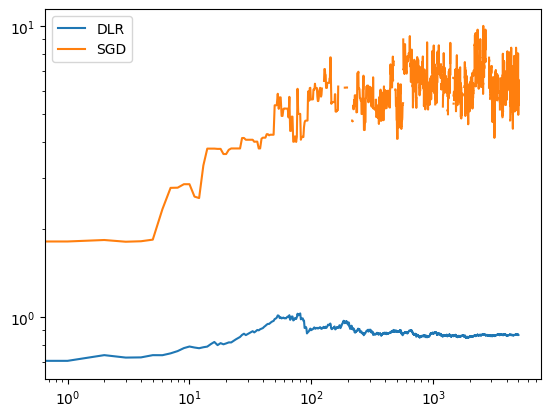

In [14]:
plt.loglog(loss_history_dlr, label="DLR")
plt.loglog(loss_history, label="SGD")
plt.legend()

As we can see the method with a dynamic learning rate is more stable.